In [1]:
from matplotlib.ticker import MaxNLocator
from sklearn.metrics import f1_score, make_scorer, confusion_matrix, accuracy_score, precision_score, recall_score, precision_recall_curve
from tensorflow.keras.activations import relu, sigmoid, softmax, tanh
from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Dense, Flatten, Input
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

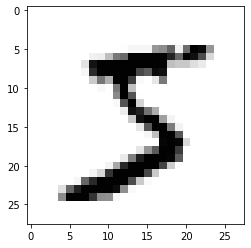

In [2]:
# Load MNIST database
(X_train,y_train), (X_val,y_val) = mnist.load_data()

# Print a train pattern
plt.imshow(X_train[0], cmap='Greys')

# Rescale pixel values
X_train = X_train / 255.0
X_val = X_val / 255.0

# Labels --> one-hot encodings
y_train = to_categorical(y_train.reshape([-1, 1]))
y_val = to_categorical(y_val.reshape([-1, 1]))

# Randomly select a continuous mini batch of zize 32 from the data
batch_size = 32
batches = int(X_train.shape[0] / batch_size)
batch = random.randint(0, batches-1)
batch_start = batch * batch_size
batch_end = batch_start + batch_size

In [3]:
def build_model(X, y, activation=softmax, layers=5, units=32, learning_rate=0.01):
    """
    Build a Neural Network model based on the data and the parameters
    """
    # Neural network parameters
    input_shape = X.shape[1:]
    output_units = y.shape[1]
    
    # Model creation
    model = Sequential()
    model.add(Input(input_shape)) # Input layer
    model.add(Flatten()) # Flatten input (transform it into 1D array)
    for i in range(layers):
        model.add(Dense(units, activation=activation)) # Intermediate layers
    model.add(Dense(output_units, activation=softmax)) # Output layer

    # Model training
    model.compile(optimizer=SGD(learning_rate=learning_rate), 
                  loss='categorical_crossentropy', 
                  metrics=['accuracy'])
    model.summary()
    
    return model

In [4]:
# Case (i): 5 intermediate layers

# Intermediate layers activation function
intermediate_layers = 5

# Units per intermediate layer
units = 32

# Learning rate
learning_rate = 0.01

# Epochs
epochs = 10

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 32)                25120     
_________________________________________________________________
dense_1 (Dense)              (None, 32)                1056      
_________________________________________________________________
dense_2 (Dense)              (None, 32)                1056      
_________________________________________________________________
dense_3 (Dense)              (None, 32)                1056      
_________________________________________________________________
dense_4 (Dense)              (None, 32)                1056      
_________________________________________________________________
dense_5 (Dense)              (None, 10)                3

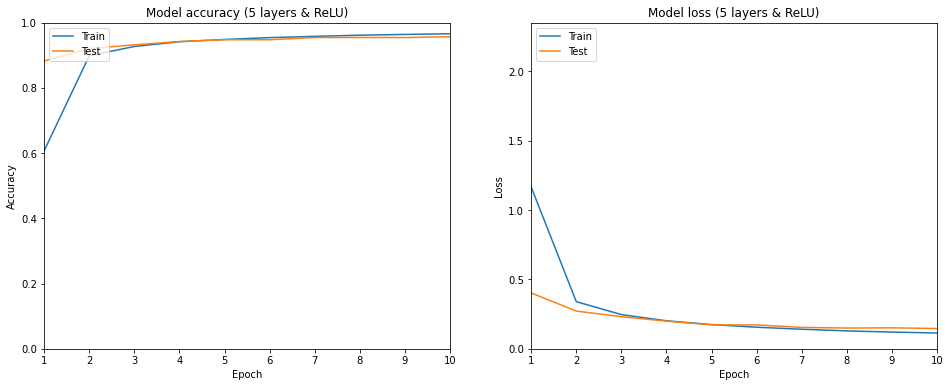

Accuracy: 0.9521
Precision: 0.9568241303450813
Recall: 0.9627521083884061
F1 score: 0.9513955790092178


In [5]:
# Subcase (a): ReLU
activation = relu

model = build_model(X_train, y_train, activation, intermediate_layers, units, learning_rate)

history = model.fit(X_train, y_train, epochs=epochs, validation_data=(X_val,y_val))

fig = plt.figure(figsize=(16,6))

# Plot training & validation accuracy values
plt.subplot(1, 2, 1)
plt.plot(range(1,epochs+1),history.history['accuracy'])
plt.plot(range(1,epochs+1),history.history['val_accuracy'])
plt.title('Model accuracy (' + str(intermediate_layers) +' layers & ReLU)')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.ylim(0., 1.)
plt.xlim(1, epochs)
plt.xticks(range(1,epochs+1))

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(range(1,epochs+1),history.history['loss'])
plt.plot(range(1,epochs+1),history.history['val_loss'])
plt.title('Model loss (' + str(intermediate_layers) +' layers & ReLU)')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.ylim(0., 2.35)
plt.xlim(1, epochs)
plt.xticks(range(1,epochs+1))

plt.show()
# fig.savefig(f'./relu-{intermediate_layers}.png')

# Evaluate the model
y_val_pred = model.predict(X_val)
y_val_pred_cat = (np.asarray(y_val_pred)).round()
acc, prec, rec, f1 = accuracy_score(y_val, y_val_pred_cat), \
                    f1_score(y_val, y_val_pred_cat, average='macro'), \
                    precision_score(y_val, y_val_pred_cat, average='macro'), \
                    recall_score(y_val, y_val_pred_cat, average='macro')

print('Accuracy:', acc)
print('Precision:', prec)
print('Recall:', rec)
print('F1 score:', f1)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 32)                25120     
_________________________________________________________________
dense_7 (Dense)              (None, 32)                1056      
_________________________________________________________________
dense_8 (Dense)              (None, 32)                1056      
_________________________________________________________________
dense_9 (Dense)              (None, 32)                1056      
_________________________________________________________________
dense_10 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_11 (Dense)             (None, 10)               

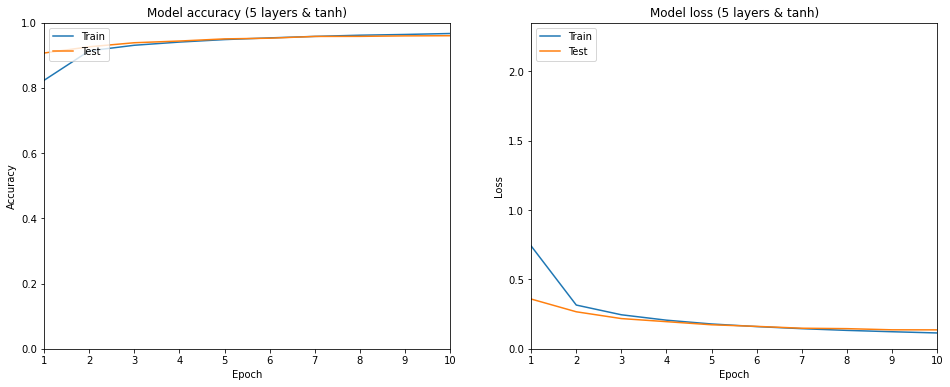

Accuracy: 0.9552
Precision: 0.9598711322878529
Recall: 0.9655529399874968
F1 score: 0.9546178332228923


In [6]:
# Subcase (b): Hyperbolic tangent - tanh
activation = tanh

model = build_model(X_train, y_train, activation, intermediate_layers, units, learning_rate)

history = model.fit(X_train, y_train, epochs=epochs, validation_data=(X_val,y_val))

fig = plt.figure(figsize=(16,6))

# Plot training & validation accuracy values
plt.subplot(1, 2, 1)
plt.plot(range(1,epochs+1),history.history['accuracy'])
plt.plot(range(1,epochs+1),history.history['val_accuracy'])
plt.title('Model accuracy (' + str(intermediate_layers) +' layers & tanh)')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.ylim(0., 1.)
plt.xlim(1, epochs)
plt.xticks(range(1,epochs+1))

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(range(1,epochs+1),history.history['loss'])
plt.plot(range(1,epochs+1),history.history['val_loss'])
plt.title('Model loss (' + str(intermediate_layers) +' layers & tanh)')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.ylim(0., 2.35)
plt.xlim(1, epochs)
plt.xticks(range(1,epochs+1))

plt.show()
# fig.savefig(f'./tanh-{intermediate_layers}.png')

# Evaluate the model
y_val_pred = model.predict(X_val)
y_val_pred_cat = (np.asarray(y_val_pred)).round()
acc, prec, rec, f1 = accuracy_score(y_val, y_val_pred_cat), \
                    f1_score(y_val, y_val_pred_cat, average='macro'), \
                    precision_score(y_val, y_val_pred_cat, average='macro'), \
                    recall_score(y_val, y_val_pred_cat, average='macro')

print('Accuracy:', acc)
print('Precision:', prec)
print('Recall:', rec)
print('F1 score:', f1)

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_12 (Dense)             (None, 32)                25120     
_________________________________________________________________
dense_13 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_14 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_15 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_16 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_17 (Dense)             (None, 10)               

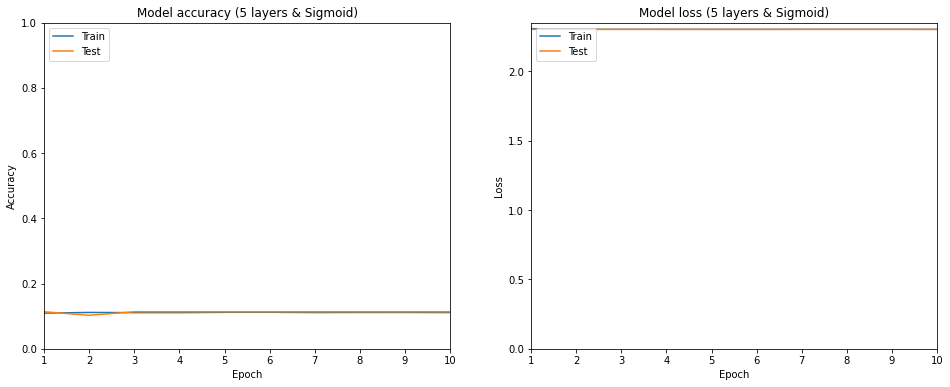

Accuracy: 0.0
Precision: 0.0
Recall: 0.0
F1 score: 0.0


/home/bishop/miniconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [7]:
# Subcase (c): Sigmoid
activation = sigmoid

model = build_model(X_train, y_train, activation, intermediate_layers, units, learning_rate)

history = model.fit(X_train, y_train, epochs=epochs, validation_data=(X_val,y_val))

fig = plt.figure(figsize=(16,6))

# Plot training & validation accuracy values
plt.subplot(1, 2, 1)
plt.plot(range(1,epochs+1),history.history['accuracy'])
plt.plot(range(1,epochs+1),history.history['val_accuracy'])
plt.title('Model accuracy (' + str(intermediate_layers) +' layers & Sigmoid)')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.ylim(0., 1.)
plt.xlim(1, epochs)
plt.xticks(range(1,epochs+1))

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(range(1,epochs+1),history.history['loss'])
plt.plot(range(1,epochs+1),history.history['val_loss'])
plt.title('Model loss (' + str(intermediate_layers) +' layers & Sigmoid)')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.ylim(0., 2.35)
plt.xlim(1, epochs)
plt.xticks(range(1,epochs+1))

plt.show()
# fig.savefig(f'./sigmoid-{intermediate_layers}.png')

# Evaluate the model
y_val_pred = model.predict(X_val)
y_val_pred_cat = (np.asarray(y_val_pred)).round()
acc, prec, rec, f1 = accuracy_score(y_val, y_val_pred_cat), \
                    f1_score(y_val, y_val_pred_cat, average='macro'), \
                    precision_score(y_val, y_val_pred_cat, average='macro'), \
                    recall_score(y_val, y_val_pred_cat, average='macro')

print('Accuracy:', acc)
print('Precision:', prec)
print('Recall:', rec)
print('F1 score:', f1)

In [8]:
# Case (ii): 20 intermediate layers

# Intermediate layers activation function
intermediate_layers = 20

# Units per intermediate layer
units = 32

# Learning rate
lr = 0.01

# Epochs
epochs = 10

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_3 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_18 (Dense)             (None, 32)                25120     
_________________________________________________________________
dense_19 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_20 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_21 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_22 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_23 (Dense)             (None, 32)               

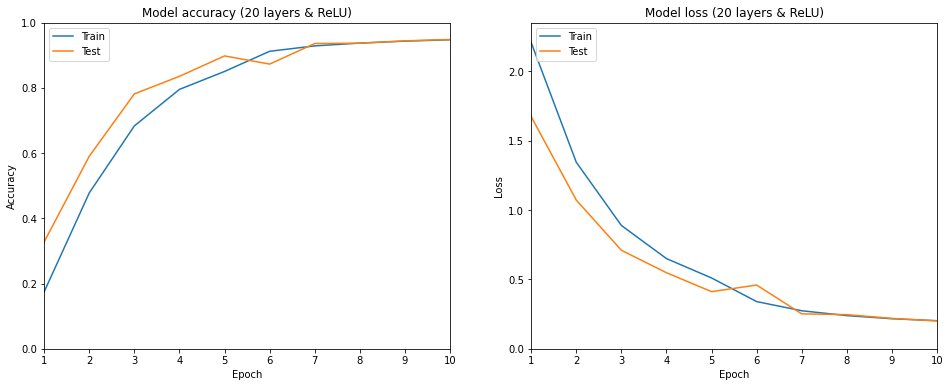

Accuracy: 0.9425
Precision: 0.9498680498705282
Recall: 0.958341636768308
F1 score: 0.94182402767511


In [9]:
# Subcase (a): ReLU
activation = relu

model = build_model(X_train, y_train, activation, intermediate_layers, units, learning_rate)

history = model.fit(X_train, y_train, epochs=epochs, validation_data=(X_val,y_val))

fig = plt.figure(figsize=(16,6))

# Plot training & validation accuracy values
plt.subplot(1, 2, 1)
plt.plot(range(1,epochs+1),history.history['accuracy'])
plt.plot(range(1,epochs+1),history.history['val_accuracy'])
plt.title('Model accuracy (' + str(intermediate_layers) +' layers & ReLU)')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.ylim(0., 1.)
plt.xlim(1, epochs)
plt.xticks(range(1,epochs+1))

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(range(1,epochs+1),history.history['loss'])
plt.plot(range(1,epochs+1),history.history['val_loss'])
plt.title('Model loss (' + str(intermediate_layers) +' layers & ReLU)')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.ylim(0., 2.35)
plt.xlim(1, epochs)
plt.xticks(range(1,epochs+1))

plt.show()
# fig.savefig(f'./relu-{intermediate_layers}.png')

# Evaluate the model
y_val_pred = model.predict(X_val)
y_val_pred_cat = (np.asarray(y_val_pred)).round()
acc, prec, rec, f1 = accuracy_score(y_val, y_val_pred_cat), \
                    f1_score(y_val, y_val_pred_cat, average='macro'), \
                    precision_score(y_val, y_val_pred_cat, average='macro'), \
                    recall_score(y_val, y_val_pred_cat, average='macro')

print('Accuracy:', acc)
print('Precision:', prec)
print('Recall:', rec)
print('F1 score:', f1)

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_4 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_39 (Dense)             (None, 32)                25120     
_________________________________________________________________
dense_40 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_41 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_42 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_43 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_44 (Dense)             (None, 32)               

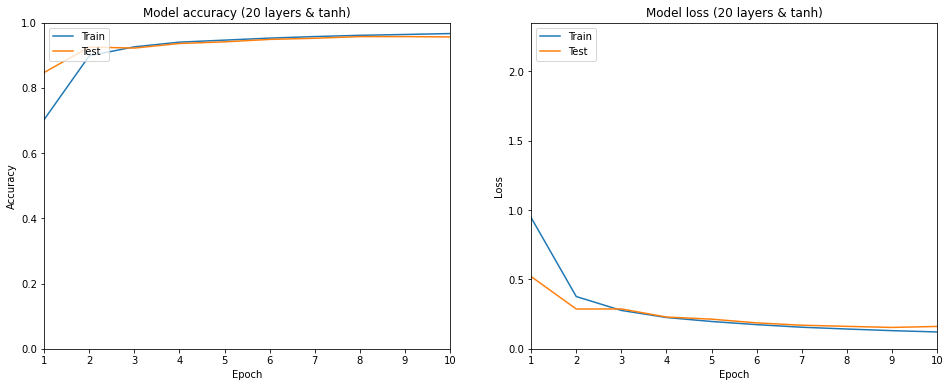

Accuracy: 0.9523
Precision: 0.9558066462068091
Recall: 0.9602222451539602
F1 score: 0.9519157261753687


In [10]:
# Subcase (b): Hyperbolic tangent - tanh
activation = tanh

model = build_model(X_train, y_train, activation, intermediate_layers, units, learning_rate)

history = model.fit(X_train, y_train, epochs=epochs, validation_data=(X_val,y_val))

fig = plt.figure(figsize=(16,6))

# Plot training & validation accuracy values
plt.subplot(1, 2, 1)
plt.plot(range(1,epochs+1),history.history['accuracy'])
plt.plot(range(1,epochs+1),history.history['val_accuracy'])
plt.title('Model accuracy (' + str(intermediate_layers) +' layers & tanh)')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.ylim(0., 1.)
plt.xlim(1, epochs)
plt.xticks(range(1,epochs+1))

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(range(1,epochs+1),history.history['loss'])
plt.plot(range(1,epochs+1),history.history['val_loss'])
plt.title('Model loss (' + str(intermediate_layers) +' layers & tanh)')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.ylim(0., 2.35)
plt.xlim(1, epochs)
plt.xticks(range(1,epochs+1))

plt.show()
# fig.savefig(f'./tanh-{intermediate_layers}.png')

# Evaluate the model
y_val_pred = model.predict(X_val)
y_val_pred_cat = (np.asarray(y_val_pred)).round()
acc, prec, rec, f1 = accuracy_score(y_val, y_val_pred_cat), \
                    f1_score(y_val, y_val_pred_cat, average='macro'), \
                    precision_score(y_val, y_val_pred_cat, average='macro'), \
                    recall_score(y_val, y_val_pred_cat, average='macro')

print('Accuracy:', acc)
print('Precision:', prec)
print('Recall:', rec)
print('F1 score:', f1)

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_5 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_60 (Dense)             (None, 32)                25120     
_________________________________________________________________
dense_61 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_62 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_63 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_64 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_65 (Dense)             (None, 32)               

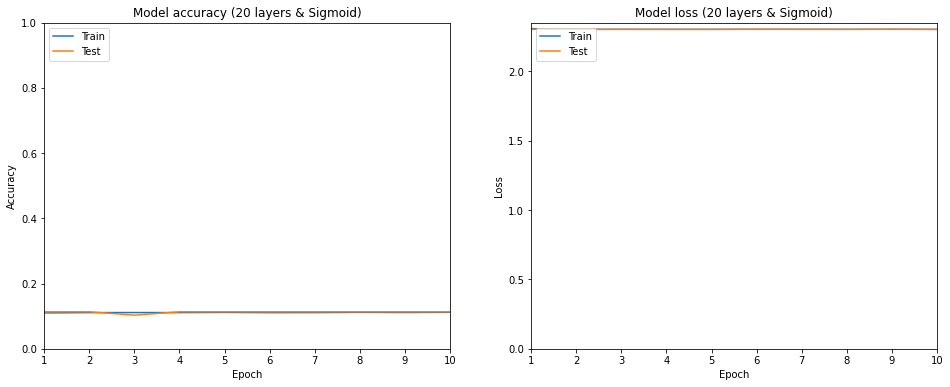

Accuracy: 0.0
Precision: 0.0
Recall: 0.0
F1 score: 0.0


/home/bishop/miniconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [11]:
# Subcase (c): Sigmoid
activation = sigmoid

model = build_model(X_train, y_train, activation, intermediate_layers, units, learning_rate)

history = model.fit(X_train, y_train, epochs=epochs, validation_data=(X_val,y_val))

fig = plt.figure(figsize=(16,6))

# Plot training & validation accuracy values
plt.subplot(1, 2, 1)
plt.plot(range(1,epochs+1),history.history['accuracy'])
plt.plot(range(1,epochs+1),history.history['val_accuracy'])
plt.title('Model accuracy (' + str(intermediate_layers) +' layers & Sigmoid)')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.ylim(0., 1.)
plt.xlim(1, epochs)
plt.xticks(range(1,epochs+1))

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(range(1,epochs+1),history.history['loss'])
plt.plot(range(1,epochs+1),history.history['val_loss'])
plt.title('Model loss (' + str(intermediate_layers) +' layers & Sigmoid)')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.ylim(0., 2.35)
plt.xlim(1, epochs)
plt.xticks(range(1,epochs+1))

plt.show()
# fig.savefig(f'./sigmoid-{intermediate_layers}.png')

# Evaluate the model
y_val_pred = model.predict(X_val)
y_val_pred_cat = (np.asarray(y_val_pred)).round()
acc, prec, rec, f1 = accuracy_score(y_val, y_val_pred_cat), \
                    f1_score(y_val, y_val_pred_cat, average='macro'), \
                    precision_score(y_val, y_val_pred_cat, average='macro'), \
                    recall_score(y_val, y_val_pred_cat, average='macro')

print('Accuracy:', acc)
print('Precision:', prec)
print('Recall:', rec)
print('F1 score:', f1)

In [12]:
# Case (iii): 40 intermediate layers

# Intermediate layers activation function
intermediate_layers = 40

# Units per intermediate layer
units = 32

# Learning rate
lr = 0.01

# Epochs
epochs = 10

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_6 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_81 (Dense)             (None, 32)                25120     
_________________________________________________________________
dense_82 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_83 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_84 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_85 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_86 (Dense)             (None, 32)               

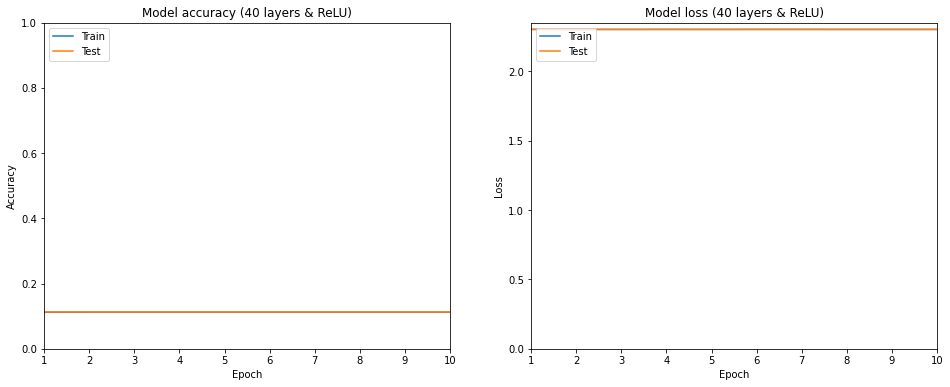

Accuracy: 0.0
Precision: 0.0
Recall: 0.0
F1 score: 0.0


/home/bishop/miniconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [13]:
# Subcase (a): ReLU
activation = relu

model = build_model(X_train, y_train, activation, intermediate_layers, units, learning_rate)

history = model.fit(X_train, y_train, epochs=epochs, validation_data=(X_val,y_val))

fig = plt.figure(figsize=(16,6))

# Plot training & validation accuracy values
plt.subplot(1, 2, 1)
plt.plot(range(1,epochs+1),history.history['accuracy'])
plt.plot(range(1,epochs+1),history.history['val_accuracy'])
plt.title('Model accuracy (' + str(intermediate_layers) +' layers & ReLU)')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.ylim(0., 1.)
plt.xlim(1, epochs)
plt.xticks(range(1,epochs+1))

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(range(1,epochs+1),history.history['loss'])
plt.plot(range(1,epochs+1),history.history['val_loss'])
plt.title('Model loss (' + str(intermediate_layers) +' layers & ReLU)')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.ylim(0., 2.35)
plt.xlim(1, epochs)
plt.xticks(range(1,epochs+1))

plt.show()
# fig.savefig(f'./relu-{intermediate_layers}.png')

# Evaluate the model
y_val_pred = model.predict(X_val)
y_val_pred_cat = (np.asarray(y_val_pred)).round()
acc, prec, rec, f1 = accuracy_score(y_val, y_val_pred_cat), \
                    f1_score(y_val, y_val_pred_cat, average='macro'), \
                    precision_score(y_val, y_val_pred_cat, average='macro'), \
                    recall_score(y_val, y_val_pred_cat, average='macro')

print('Accuracy:', acc)
print('Precision:', prec)
print('Recall:', rec)
print('F1 score:', f1)

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_7 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_122 (Dense)            (None, 32)                25120     
_________________________________________________________________
dense_123 (Dense)            (None, 32)                1056      
_________________________________________________________________
dense_124 (Dense)            (None, 32)                1056      
_________________________________________________________________
dense_125 (Dense)            (None, 32)                1056      
_________________________________________________________________
dense_126 (Dense)            (None, 32)                1056      
_________________________________________________________________
dense_127 (Dense)            (None, 32)               

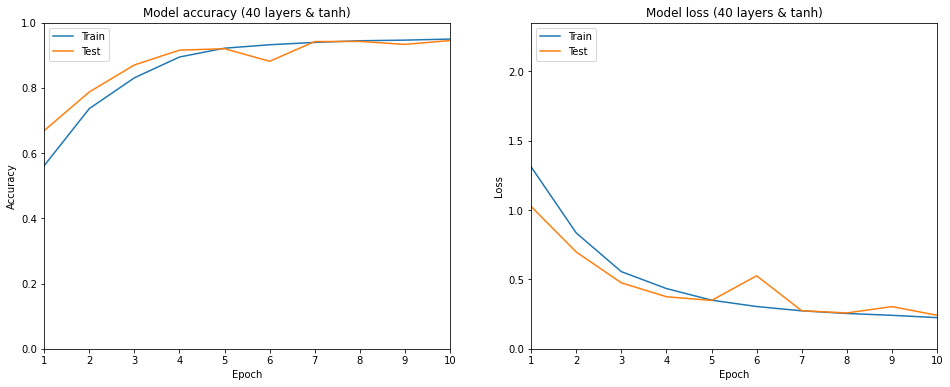

Accuracy: 0.9384
Precision: 0.9453521007801322
Recall: 0.9529670707231045
F1 score: 0.9381418142759094


In [14]:
# Subcase (b): Hyperbolic tangent - tanh
activation = tanh

model = build_model(X_train, y_train, activation, intermediate_layers, units, learning_rate)

history = model.fit(X_train, y_train, epochs=epochs, validation_data=(X_val,y_val))

fig = plt.figure(figsize=(16,6))

# Plot training & validation accuracy values
plt.subplot(1, 2, 1)
plt.plot(range(1,epochs+1),history.history['accuracy'])
plt.plot(range(1,epochs+1),history.history['val_accuracy'])
plt.title('Model accuracy (' + str(intermediate_layers) +' layers & tanh)')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.ylim(0., 1.)
plt.xlim(1, epochs)
plt.xticks(range(1,epochs+1))

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(range(1,epochs+1),history.history['loss'])
plt.plot(range(1,epochs+1),history.history['val_loss'])
plt.title('Model loss (' + str(intermediate_layers) +' layers & tanh)')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.ylim(0., 2.35)
plt.xlim(1, epochs)
plt.xticks(range(1,epochs+1))

plt.show()
# fig.savefig(f'./tanh-{intermediate_layers}.png')

# Evaluate the model
y_val_pred = model.predict(X_val)
y_val_pred_cat = (np.asarray(y_val_pred)).round()
acc, prec, rec, f1 = accuracy_score(y_val, y_val_pred_cat), \
                    f1_score(y_val, y_val_pred_cat, average='macro'), \
                    precision_score(y_val, y_val_pred_cat, average='macro'), \
                    recall_score(y_val, y_val_pred_cat, average='macro')

print('Accuracy:', acc)
print('Precision:', prec)
print('Recall:', rec)
print('F1 score:', f1)

In [ ]:
# Subcase (c): Sigmoid
activation = sigmoid

model = build_model(X_train, y_train, activation, intermediate_layers, units, learning_rate)

history = model.fit(X_train, y_train, epochs=epochs, validation_data=(X_val,y_val))

fig = plt.figure(figsize=(16,6))

# Plot training & validation accuracy values
plt.subplot(1, 2, 1)
plt.plot(range(1,epochs+1),history.history['accuracy'])
plt.plot(range(1,epochs+1),history.history['val_accuracy'])
plt.title('Model accuracy (' + str(intermediate_layers) +' layers & Sigmoid)')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.ylim(0., 1.)
plt.xlim(1, epochs)
plt.xticks(range(1,epochs+1))

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(range(1,epochs+1),history.history['loss'])
plt.plot(range(1,epochs+1),history.history['val_loss'])
plt.title('Model loss (' + str(intermediate_layers) +' layers & Sigmoid)')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.ylim(0., 2.35)
plt.xlim(1, epochs)
plt.xticks(range(1,epochs+1))

plt.show()
# fig.savefig(f'./sigmoid-{intermediate_layers}.png')

# Evaluate the model
y_val_pred = model.predict(X_val)
y_val_pred_cat = (np.asarray(y_val_pred)).round()
acc, prec, rec, f1 = accuracy_score(y_val, y_val_pred_cat), \
                    f1_score(y_val, y_val_pred_cat, average='macro'), \
                    precision_score(y_val, y_val_pred_cat, average='macro'), \
                    recall_score(y_val, y_val_pred_cat, average='macro')

print('Accuracy:', acc)
print('Precision:', prec)
print('Recall:', rec)
print('F1 score:', f1)

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_8 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_163 (Dense)            (None, 32)                25120     
_________________________________________________________________
dense_164 (Dense)            (None, 32)                1056      
_________________________________________________________________
dense_165 (Dense)            (None, 32)                1056      
_________________________________________________________________
dense_166 (Dense)            (None, 32)                1056      
_________________________________________________________________
dense_167 (Dense)            (None, 32)                1056      
_________________________________________________________________
dense_168 (Dense)            (None, 32)               